In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from scipy import stats
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [5]:
raisin = pd.read_csv('D:/study docs/Kaggle/Datasets/Raisin_Dataset.csv')
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [6]:
raisin.shape

(900, 8)

In [7]:
raisin.info()#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [8]:
raisin['Class'] = raisin['Class'].astype('category')   

In [9]:
raisin.dtypes

Area                  int64
MajorAxisLength     float64
MinorAxisLength     float64
Eccentricity        float64
ConvexArea            int64
Extent              float64
Perimeter           float64
Class              category
dtype: object

In [10]:
raisin.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [11]:
raisin[raisin.duplicated()]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class


In [12]:
raisin['Class'].value_counts()

Besni      450
Kecimen    450
Name: Class, dtype: int64

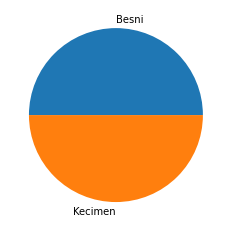

In [13]:
plt.pie(raisin['Class'].value_counts(),labels = ['Besni','Kecimen'])
plt.show()

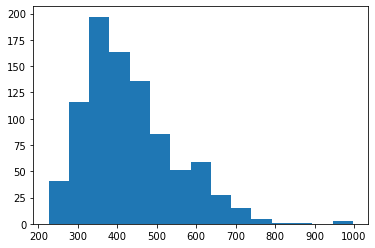

In [14]:
plt.hist(raisin['MajorAxisLength'],bins = 15)
plt.show()

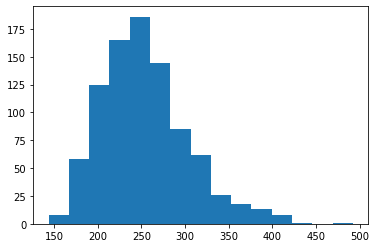

In [15]:
plt.hist(raisin['MinorAxisLength'],bins = 15)
plt.show()

In [16]:
le = LabelEncoder()
raisin['Class'] = le.fit_transform(raisin['Class'])

In [17]:
raisin.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636,0.500000
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315,0.500278
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000,0.000000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750,0.000000
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000,0.500000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750,1.000000
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000,1.000000


In [18]:
raisin.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,-0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,-0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,-0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,-0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,-0.665981
Class,-0.625715,-0.673194,-0.503102,-0.438500,-0.625567,0.154689,-0.665981,1.000000


In [19]:
x = raisin.iloc[:,:-1]
y = raisin.iloc[:,-1]

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

set_printoptions(suppress = True)
print(fit.scores_)
features = fit.transform(x)

[6097821.68611062   12729.51899533    2234.35121959       1.80425968
 6412753.36889067       0.08791728   25631.42351815]


In [20]:
model = LogisticRegression(max_iter=400)
model.fit(x,y)
rfe = RFE(model)
fit = rfe.fit(x, y)

In [21]:
y_pred = model.predict(x)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       450
           1       0.84      0.87      0.86       450

    accuracy                           0.85       900
   macro avg       0.85      0.85      0.85       900
weighted avg       0.85      0.85      0.85       900



In [23]:
rfe.support_

array([False, False,  True,  True, False,  True, False])

In [24]:
raisin1 = raisin.drop(columns = ['MinorAxisLength','Eccentricity','Extent'],axis = 1)

In [25]:
raisin1.corr()

,Area,MajorAxisLength,ConvexArea,Perimeter,Class
Area,1.000000,0.932774,0.995920,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.945031,0.977978,-0.673194
ConvexArea,0.995920,0.945031,1.000000,0.976612,-0.625567
Perimeter,0.961352,0.977978,0.976612,1.000000,-0.665981
Class,-0.625715,-0.673194,-0.625567,-0.665981,1.000000


In [26]:
sc = StandardScaler()
scaled_data = sc.fit_transform(raisin.iloc[:,:-1])

In [27]:
pca = PCA(n_components = 5)
pca_values = pca.fit_transform(scaled_data)
pca_values

array([[ 0.07699386, -0.45332809, -1.08921421,  0.02678873,  0.14138649],
       [-0.4753759 ,  0.44536837,  0.0163725 , -0.1159446 ,  0.12199549],
       [ 0.37210892,  0.80200814,  0.78648709, -0.2649626 ,  0.0621901 ],
       ...,
       [ 0.68245105, -1.30819857,  0.09173245, -0.06681526,  0.26292546],
       [ 0.64840957,  0.97924814,  0.09141348, -0.08060355,  0.07802635],
       [ 0.48755479,  2.10811637, -0.19194068,  0.26589367,  0.06284792]])

In [28]:
var = pca.explained_variance_ratio_
var

array([0.69032694, 0.20759835, 0.0897785 , 0.00811779, 0.00311547])

In [29]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([69.03, 89.79, 98.77, 99.58, 99.89])

In [30]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), raisin[['Class']]], axis = 1)

In [31]:
finalDf.head()

,pc1,pc2,pc3,Class
0,0.076994,-0.453328,-1.089214,1
1,-0.475376,0.445368,0.016372,1
2,0.372109,0.802008,0.786487,1
3,-2.622445,-0.302564,0.482721,1
4,-0.962054,-2.967763,0.452154,1


In [32]:
finalDf.corr()

,pc1,pc2,pc3,Class
pc1,1.000000e+00,-2.867550e-17,-4.419790e-17,-0.661817
pc2,-2.867550e-17,1.000000e+00,3.691795e-17,-0.140777
pc3,-4.419790e-17,3.691795e-17,1.000000e+00,0.069929
Class,-6.618171e-01,-1.407773e-01,6.992941e-02,1.000000


In [33]:
X = finalDf.iloc[:,:-1]
Y = finalDf.iloc[:,-1]

In [34]:
model_log = LogisticRegression()
model_log.fit(X,Y)

LogisticRegression()

In [35]:
Y_pred = model_log.predict(X)

In [36]:
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       450
           1       0.85      0.89      0.87       450

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900



In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LogisticRegression()
model.fit(x_train,y_train)

log_result = model.score(x_test, y_test)
train_result = model.score(x_train,y_train)

In [38]:
print(log_result*100.0)
print(train_result * 100.0)

89.44444444444444
86.25


In [39]:
x_train.shape

(720, 3)

In [40]:
kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=kfold)

In [41]:
results.mean()*100.0

84.33333333333334

In [42]:
from sklearn.tree import DecisionTreeClassifier

cart_model = DecisionTreeClassifier(criterion = 'gini')
cart_model.fit(x_train,y_train)

cart_result = cart_model.score(x_train,y_train)
print(cart_result)



1.0


In [43]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

nb_result = nb_model.score(x_train,y_train)

print(nb_result)
print(nb_model.score(x_test,y_test))

0.8444444444444444
0.8666666666666667


In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 13)
knn_model.fit(x_train,y_train)

knn_result = knn_model.score(x_train,y_train)
print(knn_result)

print(knn_model.score(x_test,y_test))

0.8694444444444445
0.8777777777777778


In [45]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train,y_train)

svc_result = svc_model.score(x_train,y_train)
print(svc_result)

print(svc_model.score(x_test,y_test))

0.8666666666666667
0.8722222222222222


In [46]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators = 10)
ada_model.fit(x_train,y_train)

ada_result = ada_model.score(x_train,y_train)
print(ada_result)

print(ada_model.score(x_test,y_test))

0.8361111111111111
0.9111111111111111


In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

cart = DecisionTreeClassifier()
bag_model = BaggingClassifier(base_estimator=cart, n_estimators=10,random_state = 7)
bag_model.fit(x_train,y_train)

bag_result = bag_model.score(x_train,y_train)
print(bag_result)

print(bag_model.score(x_test,y_test))

0.9916666666666667
0.8444444444444444


In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100, max_features = 3)
rfc_model.fit(x_train,y_train)

RFC_result = rfc_model.score(x_train,y_train)
print(RFC_result)

print(rfc_model.score(x_test,y_test))

1.0
0.8777777777777778


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

estimators = []

model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

ensemble = VotingClassifier(estimators)
ensemble.fit(x_train,y_train)

ensemble_result = ensemble.score(x_train,y_train)
print(ensemble_result)

print(ensemble.score(x_test,y_test))

0.8819444444444444
0.8777777777777778


In [50]:
scores_dict = {
    "Model":['Logistic Regression','Decision Tree','Naive Bayes','KNN','SVC','AdaBoost',
             'Bagged Decision Tree','Random Forest','Voting Classifier'],
    
    "Accuracy": [log_result, cart_result, nb_result, knn_result, svc_result,ada_result, bag_result, RFC_result,
                 ensemble_result]
}

scores_df = pd.DataFrame(scores_dict)

scores_df

,Model,Accuracy
0,Logistic Regression,0.894444
1,Decision Tree,1.000000
2,Naive Bayes,0.844444
3,KNN,0.869444
4,SVC,0.866667
5,AdaBoost,0.836111
6,Bagged Decision Tree,0.991667
7,Random Forest,1.000000
8,Voting Classifier,0.881944


In [51]:
final_model = LogisticRegression()
final_model.fit(x_train,y_train)

final_pred = final_model.predict(x_test)

print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        81
           1       0.87      0.95      0.91        99

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180



In [52]:
actual = pd.Series(y_test[:10])
actual

146    1
19     1
361    1
76     1
638    0
568    0
75     1
781    0
206    1
633    0
Name: Class, dtype: int32

In [53]:
predicted = final_pred[:10]
predicted

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [54]:
pred_df= pd.DataFrame({'actual': actual,'predicted_prob': predicted})
pred_df

,actual,predicted_prob
146,1,1
19,1,1
361,1,1
76,1,1
638,0,0
568,0,0
75,1,1
781,0,0
206,1,1
633,0,1
